***
# **<center>Exercices#6</center>**
# ***<center>Math</center>***
# ***<center>Scipy</center>***
***

<u>Exercice 1:</u> *Volume.*  
- Ecrire un programme qui demande à l'utilisateur de saisir le rayon d'une sphere et calculer son volume en utilisant la biliothèque math.
- Afficher la troncature à l'entier inferieur du volume.
- Afficher un arrondi au centième du volume avec 2 methodes differentes

In [1]:
# Ecrire un programme qui demande à l'utilisateur de saisir le rayon d'une sphere et calculer son volume
import math
import numpy as np
rayon = float(input('Saisir le rayon en cm:'))
volume = (4/3) * math.pi * math.pow(rayon,3)
print('Volume = ',volume,'cm3')

Saisir le rayon en cm: 5


Volume =  523.5987755982989 cm3


In [3]:
# Afficher la troncature à l'entier inferieur du volume.
tronc = math.floor(volume)
print('Volume = ',tronc,'cm3')

Volume =  523 cm3


In [4]:
# Afficher un arrondi au centième du volume
arrondi = np.round(volume,2)
print('Volume = ',arrondi,'cm3')
arrondi2 = round(volume,2)
print('Volume = ',arrondi2,'cm3')

Volume =  523.6 cm3
Volume =  523.6 cm3


<u>Exercice 2:</u> *Rayons X partie 1*  
- Charger les données experimentales contenues dans le fichier  <pre>data_exo/rayonsX.npy</pre> on utilisera la fonction numpy load:    <pre>data_rx = np.load('data_exo/rayonsX.npy')</pre>
- Tracer le contenu du fichier sur un graph
- Les pics apparaissent lorsque les plans atomique du materiaux sont en condition de diffraction. C'est à dire:
$$ \lambda = 2d \sin(\theta) $$
  où :
   - $ \lambda\ $  est la longueur d'onde des rayons X (1.789 angströms),
   - d est la distance entre les plans d'atomes dans le matériau (exprimée en angströms),
   - $ \theta\ $ est l'angle d'incidence des rayons X sur les plans d'atomes (en radians)  
   Tracer un nouveau graphique où les abcisses sera la distance entre les plans d'atomes.
- Calculer la surface du pic le plus intense et colorer cette surface sur le graphiques


In [5]:
# #Creation du fichier --> A supprimer
# data = np.loadtxt('E15_bis.xy',unpack=True)
# np.save('data_exo/rayonsX.npy',data)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import simps
from scipy.signal import find_peaks
from scipy.signal import savgol_filter
from scipy import signal
from scipy.optimize import curve_fit

In [7]:
# Charger les données experimentales contenues dans le fichier
data_rx = np.load('fichiers_exercices_enonces/Scipy_ex2_rayonsX.npy')
print(data_rx.shape)
angles  = data_rx[0]
intensites  = data_rx[1]

(2, 3808)


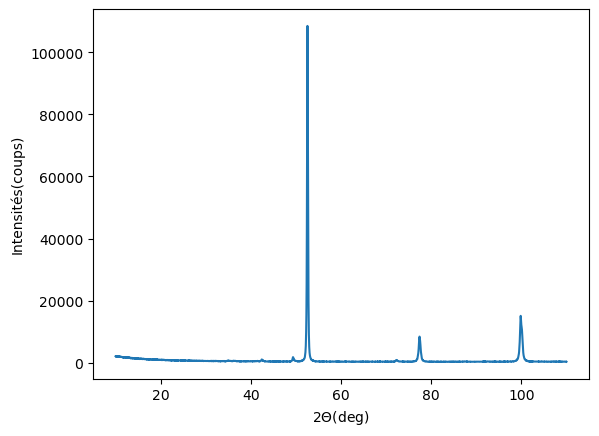

In [8]:
# Tracer le contenu du fichier sur un graph
fig,ax = plt.subplots()
ax.plot(angles, intensites)
ax.set_xlabel(r'2$\Theta$(deg)')
ax.set_ylabel('Intensités(coups)');

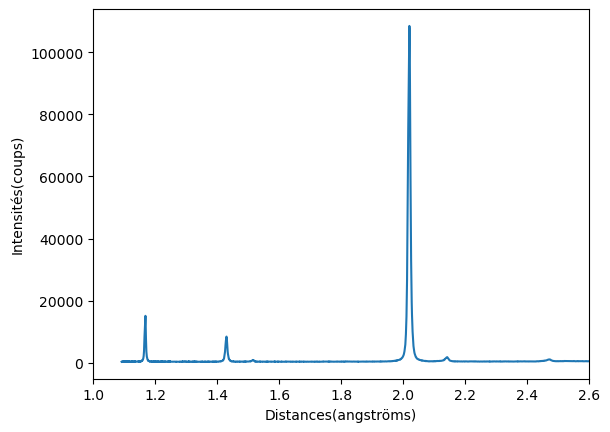

In [9]:
# Tracer un nouveau graphique où les abcisses sera la distance entre les plans d'atomes.
radians = np.radians(angles) #conversion des angles en radians
long_onde = 1.789
distances = long_onde / (2*np.sin(radians/2))
fig,ax = plt.subplots()
ax.plot(distances, intensites)
ax.set_xlabel('Distances(angströms)')
ax.set_ylabel('Intensités(coups)')
ax.set_xlim(1,2.6);

Surface du pic =  477.1210391101365


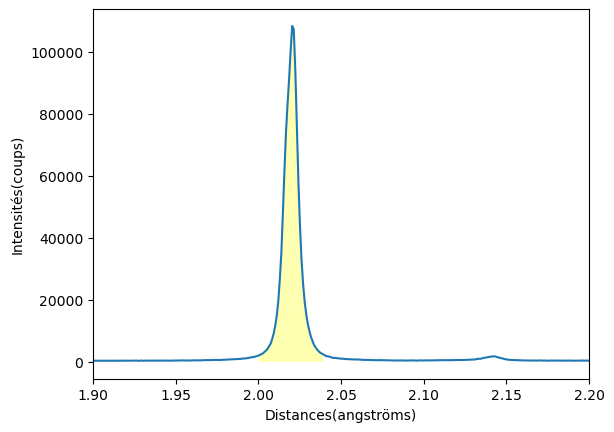

In [10]:
# Calculer la surface du pic le plus intense et colorer cette surface sur le graphiques
# Commençons par choisir des limites en distance
indices_integration = np.where((distances>2.0) & (distances<2.04))

#calcul de l'integrale (Simpson)
integrale_pic = simps(distances[indices_integration], intensites[indices_integration])
print('Surface du pic = ',integrale_pic)

#Plot du graph
fig,ax = plt.subplots()
ax.plot(distances, intensites)
ax.set_xlabel('Distances(angströms)')
ax.set_ylabel('Intensités(coups)')
ax.set_xlim(1,2.6)
# ax.fill_between(distances[indices_integration], intensites[indices_integration], where=((distances>2.0) & (distances<2.04)), facecolor='blue', alpha=0.3)
ax.fill_between(distances[indices_integration], intensites[indices_integration], facecolor='yellow', alpha=0.3)
ax.set_xlim(1.9,2.2);


<u>Exercice 3:</u> *Rayons X partie 2*  

1 -Définir une nouvelle fenêtre d'affichage pour zoomer sur une zone de la courbe et observer le bruit.
2 -Utiliser un filtre pour débruiter la courbe et afficher les courbes brute et  débruitée sur le même graph.
3 -Trouver les pics d'intensités avec la fonction find_peaks. Afficher une representation des pics détectés sur un graph avec les données débruitées.
4 -On donnes les fiches d'identification du fer et de l'oxyde de fer : 

Fiche Fe

| d(Å)    | θ (deg) | Intensity(%) |
|---------|---------|-------------|
| 2.02303 | 52.484  | 100.0       |
| 1.43050 | 77.410  | 13.6        |
| 1.16800 | 9.964   | 24.4        |




Fiche Oxyde de fer (Wuestite)

| d(Å)    | θ (deg) | Intensity(%) |
|---------|---------|-------------|
| 2.47735 | 42.332 | 64.8         | 
| 2.14545 | 49.282 | 100.0        | 
| 1.51706 | 72.262 | 46.0         | 
| 1.29376 | 87.482 | 15.8         | 
| 1.23868 | 92.464 | 11.2         | 


Copier les valeurs de d dans des tableaux numpy:


   - distances_fiche_fer (valeur copiées dans les fiches)
   - intensites_fiche_fer (valeur copiées dans les fiches)
   - distances_fiche_oxyde (valeur copiées dans les fiches)
   - intensites_fiche_oxyde (valeur copiées dans les fiches)

Creer des tableaux numpy à partir de la recherche de pics: 
- intensites_experimental  (les intensités des pics detectés)
- distances_experimental (les distances des pics détéctés)

5- Ajouter des répéres sur le graph pour reperer les pics du fer et ceux de l'oxyde de fer.

6 - Verifier la correspondance des pics de la fiche de fer (distances_fiche_fer) avec 
les pics trouvés (distances_experimental)
donner le pourcentage de correspondance pour le fer. Même question pour l'oxyde de fer. On pourra choisir une tolérance de 0.01 Angstrom au cas où les pics ne correspondraient pas précisemment aux fiches.

SOLUTION:

1 -Définir une nouvelle fenêtre d'affichage pour zoomer sur une zone de la courbe et observer le bruit.

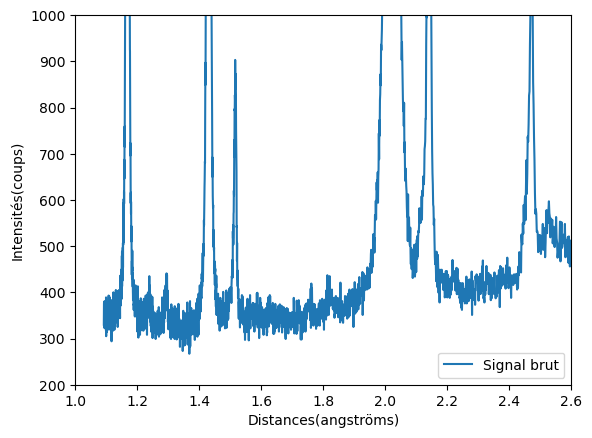

In [11]:
fig,ax = plt.subplots()
ax.plot(distances, intensites,label ='Signal brut')
ax.set_xlabel('Distances(angströms)')
ax.set_ylabel('Intensités(coups)')
ax.set_xlim(1,2.6)
ax.set_ylim(200,1000)
ax.legend();

2 -Utiliser un filtre pour débruiter la courbe et afficher les courbes brute et  débruitée sur le même graph.

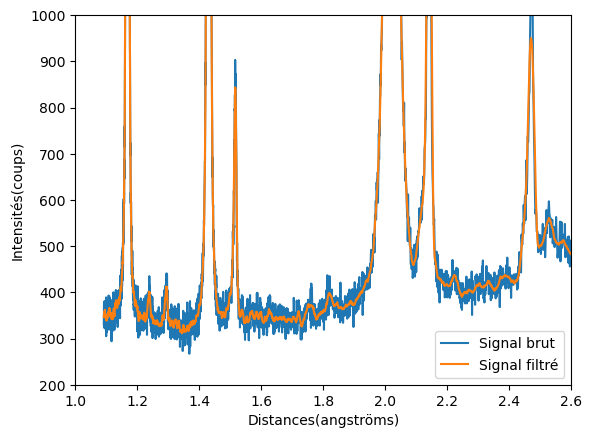

In [12]:
window_length = 25
polyorder = 3

intensites_debruit= savgol_filter(intensites, window_length, polyorder)

fig,ax = plt.subplots()
ax.plot(distances, intensites,label ='Signal brut')
ax.plot(distances, intensites_debruit,label ='Signal filtré')
ax.set_xlabel('Distances(angströms)')
ax.set_ylabel('Intensités(coups)')
ax.set_xlim(1,2.6)
ax.set_ylim(200,1000)
ax.legend();

3 -Trouver les pics d'intensités avec la fonction find_peaks. Afficher une representation des pics détectés sur un graph avec les données débruitées.

9  pics détectés
index des pics détectés [ 951 1236 1499 1620 1641 2373 2567 2951 3423]


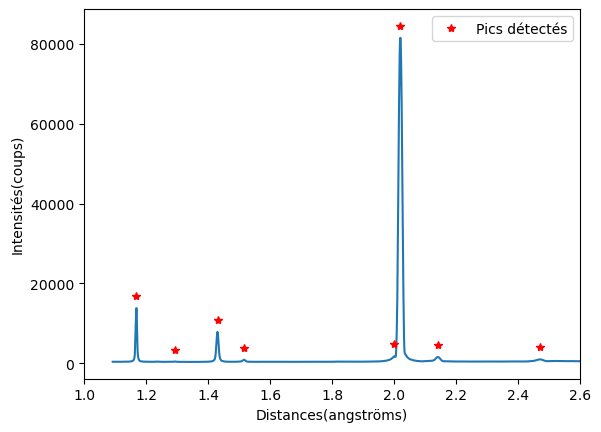

In [13]:
peaks, _ = find_peaks(intensites_debruit, height=200, distance=2,prominence=80)
print(len(peaks),' pics détectés')
print('index des pics détectés',peaks)
# Afficher une representation des pics détectés sur un graph avec les données débruitées.
fig,ax = plt.subplots()
ax.plot(distances, intensites_debruit)
ax.set_xlabel('Distances(angströms)')
ax.set_ylabel('Intensités(coups)')
ax.set_xlim(1,2.6)
# Afficher une representation des pics détectés sur un graph avec les données débruitées.
ax.plot(distances[peaks], intensites_debruit[peaks]+3000, color = 'red', label='Pics détectés',
        marker = '*',linestyle='None')
ax.legend();

4 -On donnes les fiches d'identification du fer et de l'oxyde de fer : 

Fiche Fe

| d(Å)    | θ (deg) | Intensity(%) |
|---------|---------|-------------|
| 2.02303 | 52.484  | 100.0       |
| 1.43050 | 77.410  | 13.6        |
| 1.16800 | 9.964   | 24.4        |
         



Fiche Oxyde de fer (Wuestite)

| d(Å)    | θ (deg) | Intensity(%) |
|---------|---------|-------------|
| 2.47735 | 42.332 | 64.8         | 
| 2.14545 | 49.282 | 100.0        | 
| 1.51706 | 72.262 | 46.0         | 
| 1.29376 | 87.482 | 15.8         | 
| 1.23868 | 92.464 | 11.2         | 


Copier les valeurs de d dans des tableaux numpy:


   - distances_fiche_fer (valeur copiées dans les fiches)
   - intensites_fiche_fer (valeur copiées dans les fiches)
   - distances_fiche_oxyde (valeur copiées dans les fiches)
   - intensites_fiche_oxyde (valeur copiées dans les fiches)

Creer des tableaux numpy à partir de la recherche de pics: 
- intensites_experimental  (les intensités des pics detectés)
- distances_experimental (les distances des pics détéctés)

In [14]:
# Copier les valeurs de d dans des tableaux numpy
distances_fiche_fer =  np.array([2.02303, 1.43050, 1.16800])
intensites_fiche_fer = np.array([100.0,13.6,24.4])

distances_fiche_oxyde =  np.array([2.47735,2.14545,1.51706,1.29376,1.23868])
intensites_fiche_oxyde = np.array([64.8,100.0,46.0,15.8,11.2])

#création d'un tableau contenant les valeurs de intensité_debruit aux
#index se trouvant dans peaks:
intensites_experimental = np.array([intensites_debruit[i] for i in peaks])
#idem pour les distances
distances_experimental = np.array([distances[i] for i in peaks])


print('distances fer :',distances_fiche_fer)
print('distances oxyde de fer :',distances_fiche_oxyde)
print('distances experimentales: ',distances_experimental)

distances fer : [2.02303 1.4305  1.168  ]
distances oxyde de fer : [2.47735 2.14545 1.51706 1.29376 1.23868]
distances experimentales:  [2.97574491 2.46960482 2.14153829 2.02045969 2.00097951 1.51582229
 1.43027065 1.29344528 1.16851683]


5- Ajouter des répéres sur le graph pour reperer les pics du fer et ceux de l'oxyde de fer.

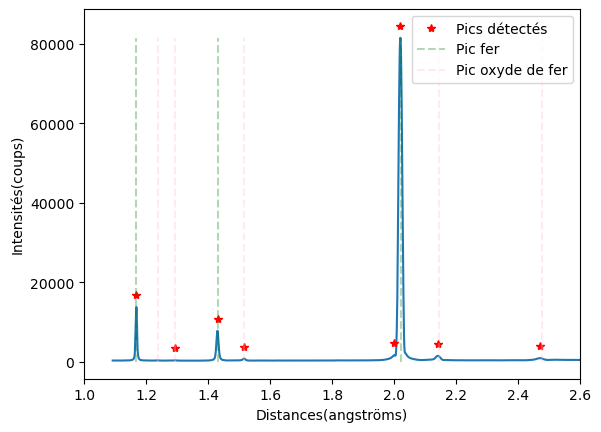

In [15]:
# Afficher une representation des pics détectés sur un graph avec les données débruitées.

# on reprend le code de l'affichage précédent
fig,ax = plt.subplots()
ax.plot(distances, intensites_debruit)
ax.set_xlabel('Distances(angströms)')
ax.set_ylabel('Intensités(coups)')
ax.set_xlim(1,2.6)

# on affiche la representation des pics détectés (étoiles rouge) sur le graph avec les données débruitées.
ax.plot(distances[peaks], intensites_debruit[peaks]+3000, color = 'red', label='Pics détectés',
        marker = '*',linestyle='None')


# et on ajoute des lignes verticales de couleurs differentes pour le fer et l'oxyde
ax.vlines(x=distances_fiche_fer, ymin=0, ymax=np.max(intensites_debruit), 
          color='green', linestyle='--', label='Pic fer',alpha=0.3)
# Ajouter des repères pour les pics d'oxyde de fer
ax.vlines(x=distances_fiche_oxyde, ymin=0, ymax=np.max(intensites_debruit), 
          color='pink', linestyle='--', label='Pic oxyde de fer',alpha=0.3)
ax.legend();

6 - Verifier la correspondance des pics de la fiche de fer (distances_fiche_fer) avec 
les pics trouvés (distances_experimental)
donner le pourcentage de correspondance pour le fer. Même question pour l'oxyde de fer

In [16]:
tolerance = 0.01

correspondance_fer = 0 # initialisation compteur

# Parcourir less pics expérimentaux
for i in distances_experimental:
    #parcourir les pics de la fiche du fer
    for k in distances_fiche_fer:
        #verifier la difference entre pics experimentaux et fiche
        if abs(k-i) <= tolerance:
            #si la difference est faible, on ajoute une correspondance au compteur
            correspondance_fer+=1
pourcentage_correspondance_fer = 100 * correspondance_fer / len(distances_fiche_fer) 
print('pourcentage de correspondance fer =',pourcentage_correspondance_fer,'%')

correspondance_oxyde = 0# initialisation compteur
for i in distances_experimental:
    for k in distances_fiche_oxyde:
        if abs(k-i) <= tolerance:
            correspondance_oxyde+=1
            
pourcentage_correspondance_oxyde = 100 * correspondance_oxyde / len(distances_fiche_oxyde) 
print('pourcentage de correspondance Oxyde =',pourcentage_correspondance_oxyde,'%')

pourcentage de correspondance fer = 100.0 %
pourcentage de correspondance Oxyde = 80.0 %


<u>Exercice 4:</u> *Rayons X partie 3*   
1 -Sur le signal non debruité, nous allons travailler sur le pic entre 2.0 et 2.04 Anstroms. Faire un fit par une courbe gaussienne.  
On utilisera la formule:

$$
G(x) = A \cdot e^{-\frac{1}{2} \left(\frac{x - \mu}{\sigma}\right)^2}
$$
avec:  
A : Amplitude  
$ \mu $: la valeur moyenne  
$ \sigma $ : l'écart type



2 -Estimer la qualité de ce fit avec le calcul du RMSE  
3 -Représenter graphiquement les résidus  
4 -Les résultats sont ils satisfaisants?  
5- Essayer d'ameliorer le fit en définissant une fonction avec la somme de 2 gaussiennes.  
6- En supplement, on pourra faire un fit avec pseudo voigt (somme d'une Gaussienne et d'une Laurentzienne)  
Gaussienne:
$$
G(x) = A \cdot e^{-\frac{1}{2} \left(\frac{x - \mu}{\sigma}\right)^2}
$$
Laurentzienne:
$$
L(x) = \frac{A}{\pi} \left(\frac{\gamma}{(x - \mu)^2 + \gamma^2}\right)
$$

- A : Amplitude
- $ \mu\ $: la valeur moyenne
- $ \sigma\ $ : l'écart type
- $ \gamma\ $ : la largeur à mi-hauteur (pour la Lorentzienne)


SOLUTION:

1 -Sur le signal non debruité, nous allons travailler sur le pic entre 2.0 et 2.04 Anstroms. Faire un ajustement  (fit) en utilisant une courbe gaussienne. 

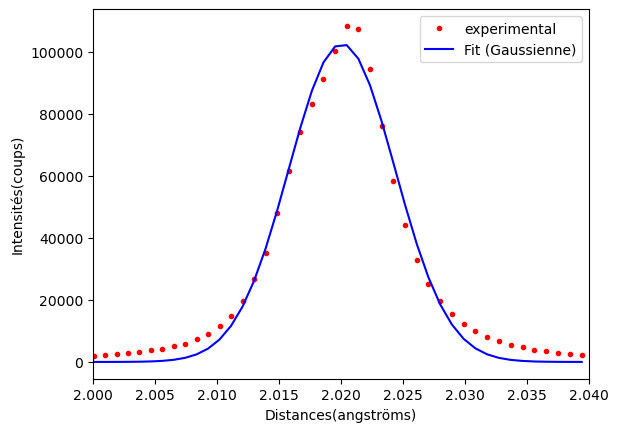

102683.56401677229 2.0200721507836294 0.004285273801704104


In [17]:
indices_fit = np.where((distances > 2.0) & (distances < 2.04))
distances_exp = distances[indices_fit]
intensites_exp = intensites[indices_fit]

fig,ax = plt.subplots()
ax.plot(distances_exp, intensites_exp,label='experimental',linestyle = 'None',marker = '.',color = 'r')
ax.set_xlabel('Distances(angströms)')
ax.set_ylabel('Intensités(coups)')
ax.set_xlim(2,2.04)


def gaussian(x, A, mu, sigma):
    return A * np.exp(-0.5 * ((x - mu) / sigma)**2)

# Déterminer les paramètres initiaux pour l'ajustement
A_initial = 100000 #Amplitude
mu_initial = 2.02 #Valeur moyenne
sigma_initial = 0.01 #ecart type

# Faire l'ajustement des données expérimentales avec la fonction gaussienne
params, cov = curve_fit(gaussian, distances_exp, intensites_exp, p0=[A_initial, mu_initial, sigma_initial])

# Récupérer les paramètres ajustés
A_fit, mu_fit, sigma_fit = params

# Générer les valeurs ajustées à partir des paramètres ajustés
fit_values = gaussian(distances_exp, A_fit, mu_fit, sigma_fit)

# Tracer la courbe d'ajustement (Gaussienne uniquement)
ax.plot(distances_exp, fit_values, 'b-', label='Fit (Gaussienne)')

plt.legend()
plt.show()
print(A_fit, mu_fit, sigma_fit)

2 -Estimer la qualité de ce fit avec le calcul du RMSE  

In [18]:
rmse = np.sqrt(np.mean((intensites_exp - fit_values)**2))
print(f'RMSE = {rmse:.4f}')

RMSE = 4094.3873


3 -Représenter graphiquement les résidus

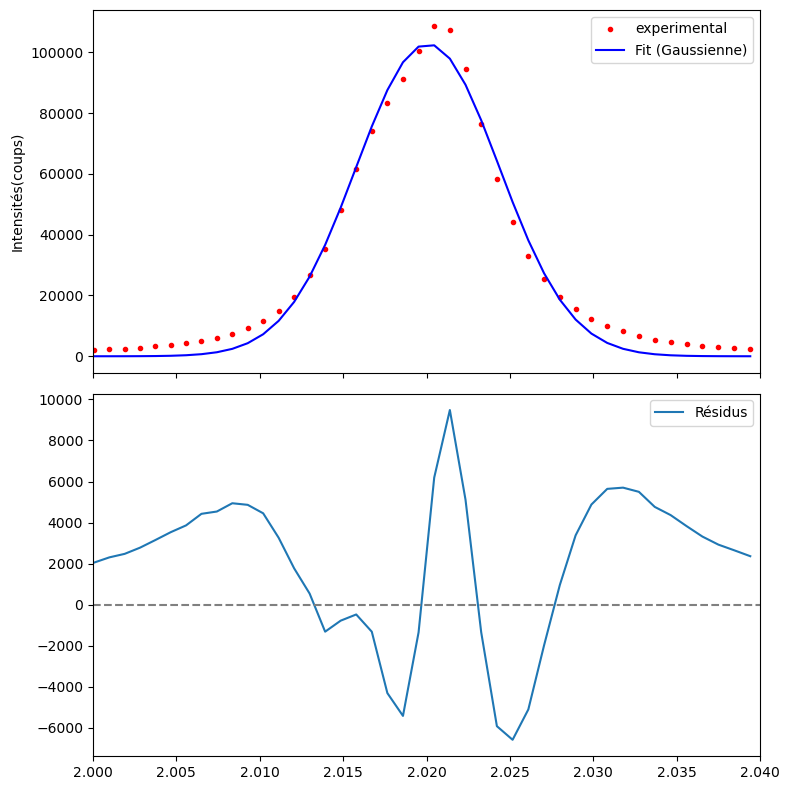

In [19]:
residus = intensites_exp - fit_values
fig, ax = plt.subplots(2, 1, figsize=(8, 8), sharex=True)
# Courbe expérimentale
ax[0].plot(distances_exp, intensites_exp,label='experimental',linestyle = 'None',marker = '.',color = 'r')
ax[0].plot(distances_exp, fit_values, 'b-', label='Fit (Gaussienne)')
ax[0].set_ylabel('Intensités(coups)')
ax[0].set_xlim(2, 2.04)
ax[0].legend()



# Tracer les résidus
ax[1].plot(distances_exp, residus, label='Résidus')
ax[1].axhline(0, color='grey', linestyle='--')
# ax[1].set_ylim(-1000, 1000)
ax[1].legend()

plt.tight_layout()
plt.show()

5- Essayer d'ameliorer le fit en définissant une fonction avec la somme de 2 gaussiennes.

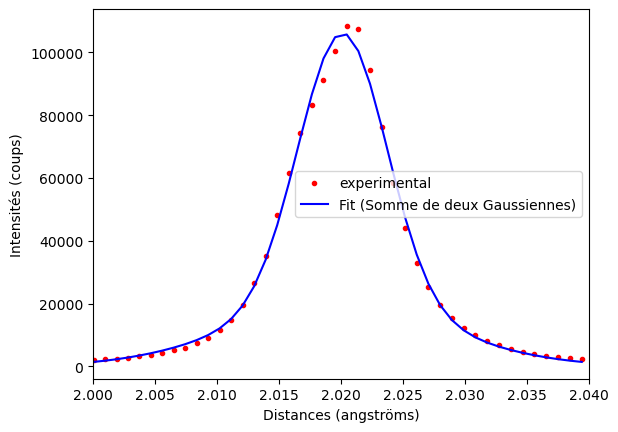

RMSE = 2262.0648


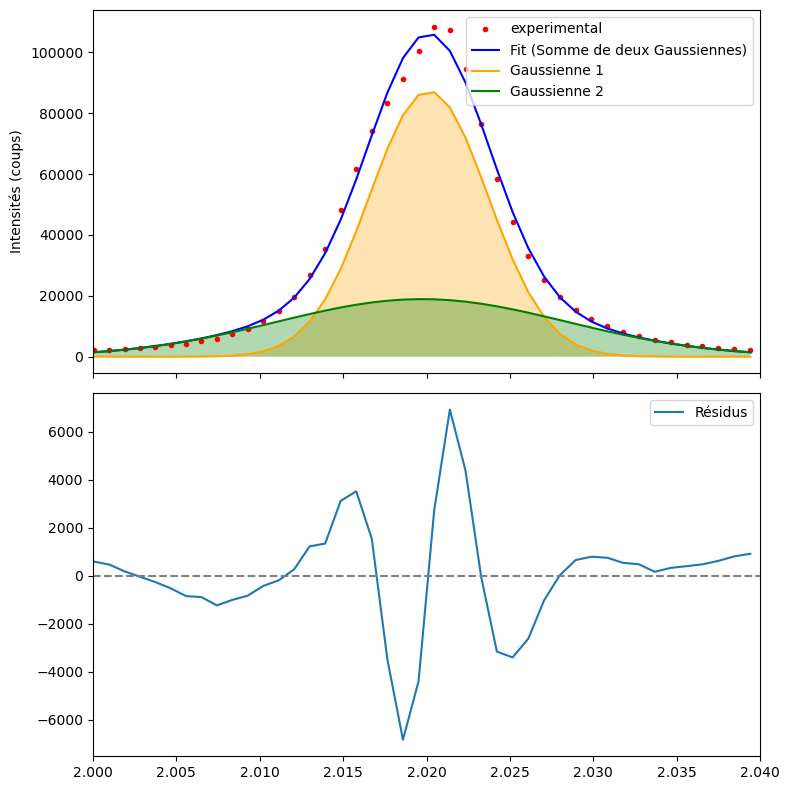

Paramètres ajustés pour la première gaussienne:
Amplitude 1 (A1_fit) = 87253.2352
Centre 1 (mu1_fit) = 2.0201
Écart type 1 (sigma1_fit) = -0.0035
Paramètres ajustés pour la deuxième gaussienne:
Amplitude 2 (A2_fit) = 18916.0637
Centre 2 (mu2_fit) = 2.0197
Écart type 2 (sigma2_fit) = -0.0087


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit



# Sélection des données pour l'ajustement (vous pouvez conserver vos propres indices_fit si vous en avez)
indices_fit = np.where((distances > 2.0) & (distances < 2.04))
distances_fit = distances[indices_fit]
intensites_fit = intensites[indices_fit]

fig, ax = plt.subplots()
ax.plot(distances_fit, intensites_fit, label='experimental', linestyle='None', marker='.', color='r')
ax.set_xlabel('Distances (angströms)')
ax.set_ylabel('Intensités (coups)')
ax.set_xlim(2, 2.04)


def gaussian(x, A, mu, sigma):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)


def double_gaussian(x, A1, mu1, sigma1, A2, mu2, sigma2):
    return gaussian(x, A1, mu1, sigma1) + gaussian(x, A2, mu2, sigma2)

# Déterminer les paramètres initiaux pour l'ajustement
A1_initial = 100000
mu1_initial = 2.022
sigma1_initial = 0.01
A2_initial = 50000
mu2_initial = 2.02
sigma2_initial = 0.03

# Faire l'ajustement des données expérimentales avec la fonction double_gaussian
params, cov = curve_fit(double_gaussian, distances_fit, intensites_fit, p0=[A1_initial, mu1_initial, sigma1_initial, A2_initial, mu2_initial, sigma2_initial])

# Récupérer les paramètres ajustés
A1_fit, mu1_fit, sigma1_fit, A2_fit, mu2_fit, sigma2_fit = params

# Générer les valeurs ajustées à partir des paramètres ajustés
fit_values = double_gaussian(distances_fit, A1_fit, mu1_fit, sigma1_fit, A2_fit, mu2_fit, sigma2_fit)

# Tracer la courbe d'ajustement (Somme de deux Gaussiennes)
ax.plot(distances_fit, fit_values, 'b-', label='Fit (Somme de deux Gaussiennes)')

plt.legend()
plt.show()

# Estimer la qualité de ce fit avec le calcul du RMSE
rmse = np.sqrt(np.mean((intensites_fit - fit_values) ** 2))
print(f'RMSE = {rmse:.4f}')

# Représenter graphiquement les résidus
residus = intensites_fit - fit_values
fig, ax = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

# Courbe expérimentale et ajustement
ax[0].plot(distances_fit, intensites_fit, label='experimental', linestyle='None', marker='.', color='r')
ax[0].plot(distances_fit, fit_values, 'b-', label='Fit (Somme de deux Gaussiennes)')
ax[0].set_ylabel('Intensités (coups)')
ax[0].set_xlim(2, 2.04)
ax[0].legend()

# Tracer les résidus
ax[1].plot(distances_fit, residus, label='Résidus')
ax[1].axhline(0, color='grey', linestyle='--')
ax[1].legend()


# Première gaussienne
y_gaussian1 = gaussian(distances_fit, A1_fit, mu1_fit, sigma1_fit)


# Deuxième gaussienne
y_gaussian2 = gaussian(distances_fit, A2_fit, mu2_fit, sigma2_fit)

# Tracer les gaussiennes individuelles
ax[0].plot(distances_fit, y_gaussian1, label='Gaussienne 1', color='orange')
ax[0].plot(distances_fit, y_gaussian2, label='Gaussienne 2', color='green')

# Ajouter les zones colorées sous les courbes des gaussiennes
ax[0].fill_between(distances_fit, y_gaussian1, facecolor='orange', alpha=0.3)
ax[0].fill_between(distances_fit, y_gaussian2, facecolor='green', alpha=0.3)

ax[0].set_ylabel('Intensités (coups)')
ax[0].set_xlim(2, 2.04)
ax[0].legend()

plt.tight_layout()
plt.show()

# Afficher les paramètres ajustés pour la première gaussienne
print("Paramètres ajustés pour la première gaussienne:")
print(f"Amplitude 1 (A1_fit) = {A1_fit:.4f}")
print(f"Centre 1 (mu1_fit) = {mu1_fit:.4f}")
print(f"Écart type 1 (sigma1_fit) = {sigma1_fit:.4f}")

# Afficher les paramètres ajustés pour la deuxième gaussienne
print("Paramètres ajustés pour la deuxième gaussienne:")
print(f"Amplitude 2 (A2_fit) = {A2_fit:.4f}")
print(f"Centre 2 (mu2_fit) = {mu2_fit:.4f}")
print(f"Écart type 2 (sigma2_fit) = {sigma2_fit:.4f}")


6- En supplement, on pourra faire un fit avec pseudo voigt (somme d'une Gaussienne et d'une Laurentzienne)  
Gaussienne:
$$
G(x) = A \cdot e^{-\frac{1}{2} \left(\frac{x - \mu}{\sigma}\right)^2}
$$
Lorentzienne:
$$
L(x) = \frac{A}{\pi} \left(\frac{\gamma}{(x - \mu)^2 + \gamma^2}\right)
$$

- A : Amplitude
- $ \mu\ $: la valeur moyenne
- $ \sigma\ $ : l'écart type
- $ \gamma\ $ : la largeur à mi-hauteur (pour la Lorentzienne)


RMSE = 830.8576


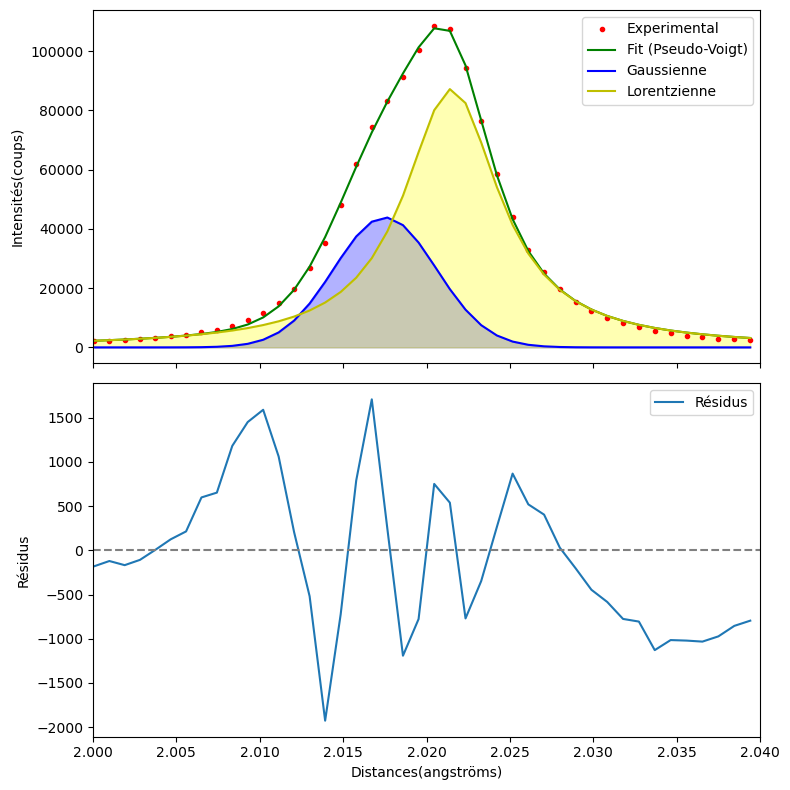

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Sélection des données pour l'ajustement (vous pouvez conserver vos propres indices_fit si vous en avez)
indices_fit = np.where((distances > 2.0) & (distances < 2.04))
distances_exp = distances[indices_fit]
intensites_exp = intensites[indices_fit]

# Définition de la fonction pseudo-Voigt avec des amplitudes distinctes pour la gaussienne et la lorentzienne
def pseudo_voigt(x, A_gauss, A_lorentz, sigma, gamma, mu_gauss, mu_lorentz, eta):
    gauss = A_gauss * (1.0 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu_gauss) / sigma)**2)
    lorentz = A_lorentz * (gamma / (np.pi * (x - mu_lorentz)**2 + gamma**2))
    return eta * gauss + (1 - eta) * lorentz

# Paramètres initiaux pour l'ajustement pseudo-Voigt
eta_initial = 0.3
A_gauss_initial = 10000  # Amplitude initiale de la gaussienne
A_lorentz_initial = 1000  # Amplitude initiale de la lorentzienne
sigma_initial = 0.01  # Écart type initial de la gaussienne
gamma_initial = 0.02  # Largeur à mi-hauteur initiale de la lorentzienne
mu_gauss_initial = 2.02  # Position initiale de la gaussienne
mu_lorentz_initial = 2.022  # Position initiale de la lorentzienne

# Ajustement des données expérimentales avec la fonction pseudo-Voigt
params, co = curve_fit(pseudo_voigt, distances_exp, intensites_exp, p0=[A_gauss_initial, A_lorentz_initial, sigma_initial, gamma_initial, mu_gauss_initial, mu_lorentz_initial, eta_initial], maxfev=10000)

# Récupération des paramètres ajustés
A_gauss_fit, A_lorentz_fit, sigma_fit, gamma_fit, mu_gauss_fit, mu_lorentz_fit, eta_fit = params

# Génération des valeurs ajustées à partir des paramètres ajustés
fit_values_pseudo_voigt = pseudo_voigt(distances_exp, A_gauss_fit, A_lorentz_fit, sigma_fit, gamma_fit, mu_gauss_fit, mu_lorentz_fit, eta_fit)

# Calcul du RMSE
rmse = np.sqrt(np.mean((intensites_exp - fit_values_pseudo_voigt)**2))
print(f'RMSE = {rmse:.4f}')

# Tracé des courbes
fig, ax = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

# Courbe expérimentale et ajustement pseudo-Voigt
ax[0].plot(distances_exp, intensites_exp, label='Experimental', linestyle='None', marker='.', color='r')
ax[0].plot(distances_exp, fit_values_pseudo_voigt, 'g-', label='Fit (Pseudo-Voigt)')
ax[0].set_ylabel('Intensités(coups)')
ax[0].set_xlim(2, 2.04)

# Résidus
residus = intensites_exp - fit_values_pseudo_voigt
ax[1].plot(distances_exp, residus, label='Résidus')
ax[1].axhline(0, color='grey', linestyle='--')
ax[1].set_xlabel('Distances(angströms)')
ax[1].set_ylabel('Résidus')
ax[1].legend()

# Tracer les courbes des gaussiennes et de la lorentzienne avec des aires sous la courbe colorée
gaussian_curve = eta_fit * A_gauss_fit * (1.0 / (sigma_fit * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((distances_exp - mu_gauss_fit) / sigma_fit)**2)
lorentzian_curve = (1-eta_fit)* A_lorentz_fit * (gamma_fit / (np.pi * (distances_exp - mu_lorentz_fit)**2 + gamma_fit**2))

ax[0].plot(distances_exp, gaussian_curve, 'b-', label='Gaussienne')
ax[0].plot(distances_exp, lorentzian_curve, 'y-', label='Lorentzienne')
ax[0].fill_between(distances_exp, gaussian_curve, alpha=0.3, color='blue')
ax[0].fill_between(distances_exp, lorentzian_curve, alpha=0.3, color='yellow')

ax[0].legend()

plt.tight_layout()
plt.show()


